# ADS 2017. Homework 1

### Question (1): (10pt)

Suppose that the independent variable $x$ has n observations: $(x_1,x_2,...x_n)$ and the dependent variable $y$ has corresponding observations: $(y_1, y_2,...,y_n)$. If the correlation between these two sequences $corr(x,y)=0.02$, which of the following statements are true? Please select all the right answers.

(a) There should be no strong relation between $x$ and $y$. - FALSE

(b) If we build a linear regression between $y$ and $x$ as $y=wx$, we could conclude that the OLS estimation for $w$ should be around 0.02. - FALSE

(c) There could be some strong linear relationship between $x$ and $y$. - FALSE

#### (d) Certain relation between $x$ and $y$ could still exist, but it should be non-linear. - TRUE

### Question (2): (10pt)



Consider a model

$y=x^{b}$ where $b>0$. 

Now, suppose x triples (originally $x>0$). How would y change with respect to this change of x? Let us denote new $y$ as $y'$. Please select all the right answers from below. 

#### (a) $y'<3y$ if b is less than one. - TRUE

(b) $y'=3y$ in any case. - FALSE

(c) $y'$ increases by $(2^b-1)*100\%$. - FALSE

#### (d) $y'>3y$ if b is bigger than one. - TRUE

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import math
%matplotlib inline

### Question (3): (30 pt)


In [2]:
x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [3]:
y=[14.0, 12.0, 18.0, -4.0, 14.0, 35.0, 45.0, 30.0, 50.0, 54.0, 58.0, 
   55.0, 57.0, 62.0, 61.0, 83.0, 85.0, 106.0, 105.0, 104.0]

#### (a) Calculate corr(x,y) without using a build-in function for the correlation coefficient.

In [4]:

## Calculate means of variables x and y
xBar = np.array(x).mean()
yBar = np.array(y).mean()

## Calculate deviation of x and y from respective means by observation
xDev = np.array(x) - xBar
yDev = np.array(y) - yBar

## Calculate product of x-deviation multiplied by y-deviation for all points (x, y). Sum them.
xyDev = xDev * yDev
xyDevSum = xyDev.sum()

## Calculate sum of squared deviations for x and y
xSS = (xDev * xDev).sum()
ySS = (yDev * yDev).sum()

## Calculate correlation coefficient
correl = xyDevSum / float((xSS * ySS) ** 0.5)
print('The correlation coefficient is: {}').format(round(correl,6)) 


The correlation coefficient is: 0.956301


#### (b) Estimate linear model $y=w_1*x+w_0$ using OLS formulas and without using build-in functions for the linear regression. What is  $w_1$ and $w_0$? What is $R^2$?

In [5]:


w1 = xyDevSum / xSS
w0 = yBar - w1 * xBar

yPred = w1 * np.array(x) + w0
yPredErr = yPred - yBar
yPredSS = (yPredErr * yPredErr).sum()
Rsquare = yPredSS / ySS

#w1, w0, Rsquare

print('The linear regression is specificed by the formula y = {} * x + {} with R-squared equal to {}').format(round(w1,6), round(w0,6), round(Rsquare,6))


The linear regression is specificed by the formula y = 5.288722 * x + 1.957143 with R-squared equal to 0.914512


#### (c) Use regression function to double check your answer making sure that your calculation is correct. 

In [6]:
df = pd.DataFrame(x,y)

linRegress  = smf.ols(formula = 'y ~ x', data = df ).fit()

print('R2 = %f'%linRegress.rsquared)
print(linRegress.params)

R2 = 0.914512
Intercept    1.957143
x            5.288722
dtype: float64


### Question (4): (30pt) 

For the data below estimate a model: AssessTot = w* LotArea (with and without intercept)

LotArea: Total area of the tax lot

AssessTot: The actual assessed total value of Final Year 2015

In [7]:
## Please update path accordignly when running this line
path = ' '
path = 'C:/Users/antho/Documents/JonathaNoneDrive/OneDrive/CUSP Masters/03 Applied Data Science/99 Homework/01 Homework 1/Homework 1/data/'
    
data_4=pd.read_csv( path + "Housing_Pluto_Session2.csv")

In [9]:
data_4.head()
#type(data_4)

,ZipCode,LotArea,AssessTot
0,11201.0,126975,3922200
1,11201.0,52600,1359900
2,11201.0,17700,656100
3,NaN,31200,18326711
4,11201.0,16307,0


#### (a). As we see, this data set is not clean.  Drop all the rows which contain "NaN" and 0 terms.

In [10]:
data_4_remove_nan = data_4.dropna()
data_4_clean = data_4_remove_nan[(data_4_remove_nan != 0).all(1)]
data_4_clean.head()

,ZipCode,LotArea,AssessTot
0,11201.0,126975,3922200
1,11201.0,52600,1359900
2,11201.0,17700,656100
5,11201.0,8120,5976000
6,11201.0,1297,56954


In [11]:
data_4_clean.describe()

,ZipCode,LotArea,AssessTot
count,275942.000000,2.759420e+05,2.759420e+05
mean,11220.410061,5.129274e+03,1.854054e+05
std,11.212427,1.696274e+05,5.788750e+06
min,11201.000000,1.000000e+00,1.000000e+00
25%,11210.000000,1.901000e+03,2.251900e+04
50%,11220.000000,2.139000e+03,3.078000e+04
75%,11230.000000,2.828000e+03,4.971400e+04
max,11416.000000,5.259196e+07,2.539648e+09


#### (b). Visualize the data set.

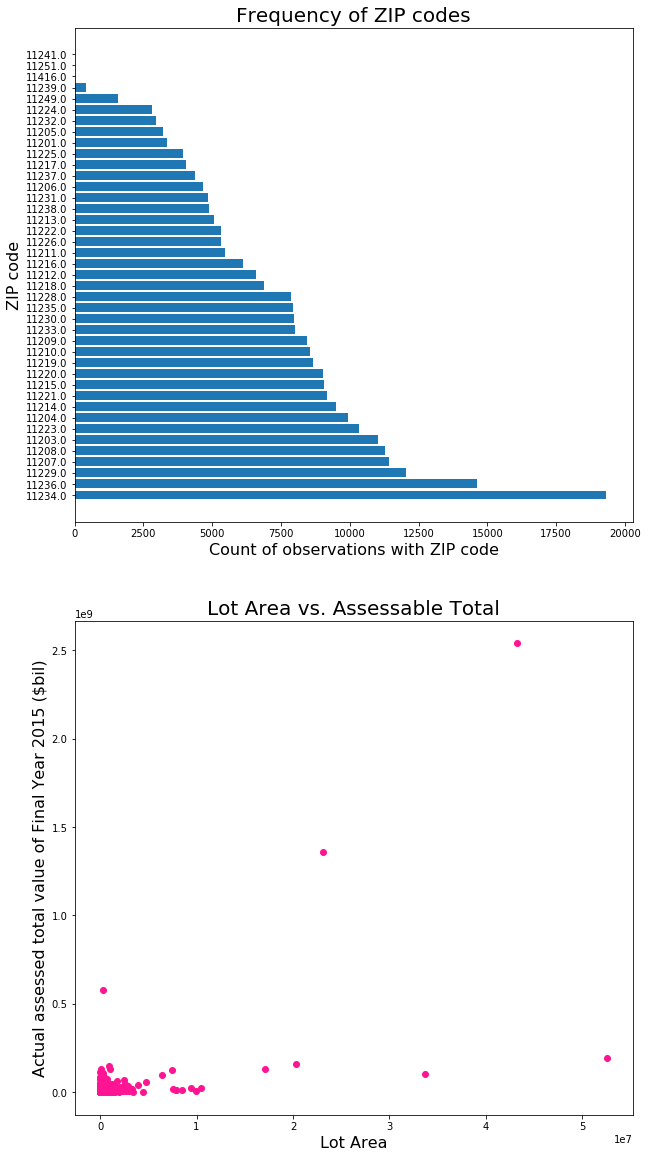

In [12]:
countOfZips = pd.DataFrame(data_4_clean['ZipCode'].value_counts())

fig = plt.figure(figsize = (10,20)) 
sub1 = plt.subplot(2, 1, 1)

y_pos = np.arange(len(countOfZips))
plt.barh(y_pos, countOfZips['ZipCode'])
plt.yticks(y_pos, countOfZips.index.values)
plt.title('Frequency of ZIP codes', fontsize = 20)
plt.xlabel('Count of observations with ZIP code', fontsize = 16)
plt.ylabel('ZIP code', fontsize = 16)



sub2 = plt.subplot(2, 1, 2)
plt.scatter(data_4_clean['LotArea'],data_4_clean['AssessTot'], c='DeepPink')
plt.title('Lot Area vs. Assessable Total', fontsize = 20)
plt.xlabel('Lot Area', fontsize = 16)
plt.ylabel('Actual assessed total value of Final Year 2015 ($bil)', fontsize = 16)




#### (c).  Build a model : AssessTot=$w_1$*LotArea + $w_2$. Get $w_1$, $w_2$ and $R^2$.  Plot your results together with observations. 

R2 = 0.384473
Intercept    76868.391376
LotArea         21.160305
dtype: float64


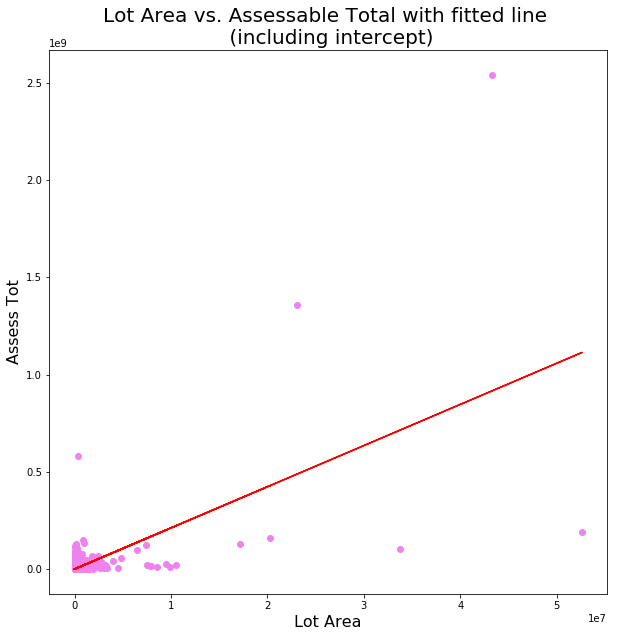

In [13]:
lm2 = smf.ols(formula = 'AssessTot ~ LotArea', data = data_4_clean).fit()
print('R2 = %f'%lm2.rsquared)
print(lm2.params)



%matplotlib inline
fig2 = plt.figure(figsize = (10,10))
plt.scatter(data_4_clean.LotArea, data_4_clean.AssessTot, c="Violet")
plt.plot(data_4_clean.LotArea, lm2.predict(), c="r")
plt.title('Lot Area vs. Assessable Total with fitted line \n (including intercept)', fontsize = 20)
plt.xlabel('Lot Area', fontsize = 16)
plt.ylabel('Assess Tot', fontsize = 16)
plt.show()

#### (d) Repeat (c) without intercept, i.e. with $w_2=0$.

R2 = 0.384928
LotArea    21.173995
dtype: float64


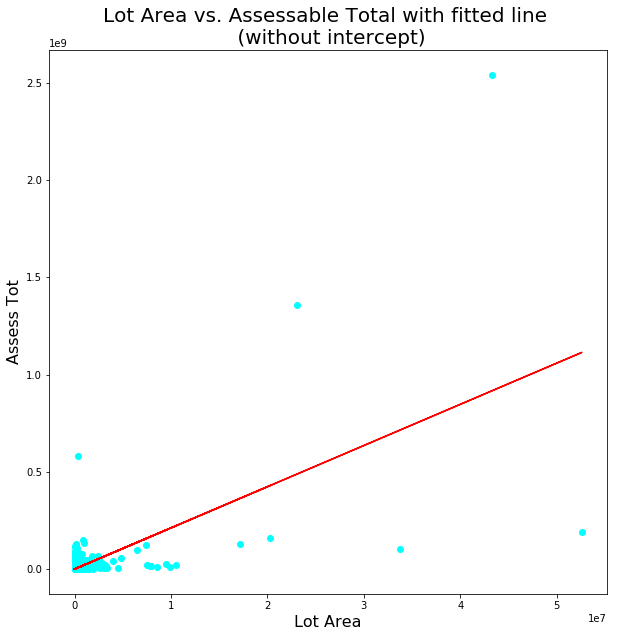

In [14]:
lm3 = smf.ols(formula = 'AssessTot ~ LotArea - 1', data = data_4_clean).fit()
print('R2 = %f'%lm3.rsquared)
print(lm3.params)

%matplotlib inline
fig3 = plt.figure(figsize = (10,10))
plt.scatter(data_4_clean.LotArea, data_4_clean.AssessTot, c="Aqua")
plt.plot(data_4_clean.LotArea, lm3.predict(),c="r")
plt.title('Lot Area vs. Assessable Total with fitted line \n (without intercept)', fontsize = 20)
plt.xlabel('Lot Area', fontsize = 16)
plt.ylabel('Assess Tot', fontsize = 16)
plt.show()

### Question (5): (20pt)

For the same data as above try the model: log_AssessTot=$w_1$*log_LotArea + $w_2$. Get $w_1$, $w_2$ and $R^2$.  And plot your results together with observations. Explain the result - what does the estimated "$w_1$" means to you?

C:\Users\antho\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\antho\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


R2 = 0.490707
Intercept      0.208794
log_LotArea    1.324973
dtype: float64


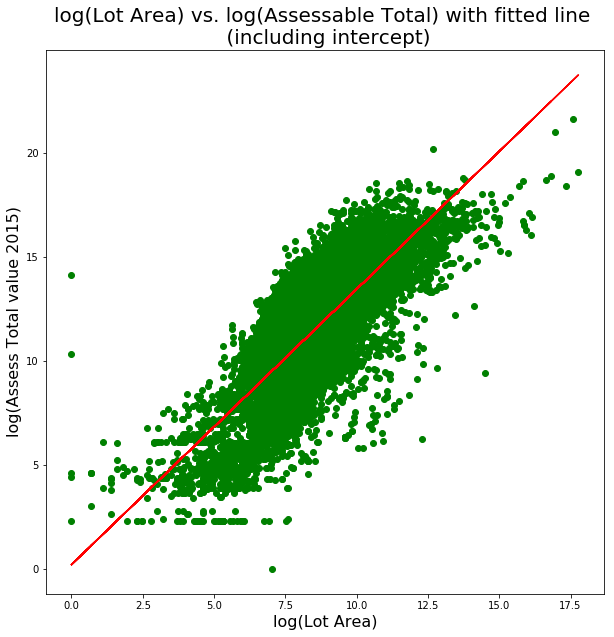

In [15]:

data_4_clean['log_AssessTot'] = np.log(data_4_clean['AssessTot'])

data_4_clean['log_LotArea'] = np.log(data_4_clean['LotArea'])

lm4 = smf.ols(formula = 'log_AssessTot ~ log_LotArea', data = data_4_clean).fit()
print('R2 = %f'%lm4.rsquared)
print(lm4.params)

%matplotlib inline
fig4 = plt.figure(figsize = (10,10))
plt.scatter(data_4_clean.log_LotArea, data_4_clean.log_AssessTot, c="g")
plt.plot(data_4_clean.log_LotArea, lm4.predict(),c="r")
plt.title('log(Lot Area) vs. log(Assessable Total) with fitted line \n (including intercept)', fontsize = 20)
plt.xlabel('log(Lot Area)', fontsize = 16)
plt.ylabel('log(Assess Total value 2015)', fontsize = 16)
plt.show()



The estimate for $w_1$ is a power scale factor. The model fitted here is log_AssessTot=$w_1$*log_LotArea + $w_2$. When you transpose the logarithms back, the equation becomes AssessTot = $A$ x $LotArea$^$w_1$ where $A$ = $exp$($w_2$). $w_1$ is the power scale factor such that if you double $LotArea$, $AssessTot$ will increase by $2$^$w_1$, i.e. $2$^$1.325$
